# Workshop #5: Probability Distributions

In [2]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sympy as sp
import scipy.stats as stats
import random

## Problem 1
A certain tennis player makes a successful first serve 70% of the time. Assume that each serve is independent of the others. If she serves 6 times, what is the probability she gets:

* all 6 serves in?
* exactly 4 serves in?
* at least 4 serves in?
* no more than 4 serves in?
* Make a bar graph to visualize the distribution

In [3]:
X = stats.binom(n=6,p=0.70)

print('P(X = 6) = ', X.pmf(6) )
print('P(X = 4) = ', X.pmf(4))
print('P(X >= 4) = ', 1-X.cdf(3))
print('P(X <= 4) = ', X.cdf(4))

P(X = 6) =  0.11764899999999996
P(X = 4) =  0.3241349999999999
P(X >= 4) =  0.7443099999999999
P(X <= 4) =  0.579825


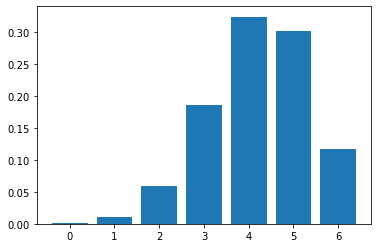

In [4]:
n = 6
p = 0.70
r_values = list(range(n + 1))

# list of pmf values

dist = [stats.binom.pmf(r, n, p) for r in r_values]

# plotting the graph 
plt.bar(r_values, dist)
plt.show()

## Problem 2

For example, suppose it is known that 2% of all credit card transactions in a certain region are fraudulent.  Assume that individual transactions are independent. If there are 50 transactions per day in a certain region find the probability that:

* exactly 2 fraudulent transactions occur?
* at least 3 fraudulent transactions occur?
* at most 4 fraudulent transactions occur?
* make a bar graph to visualize the distribution

In [5]:
fraudelent_rv = stats.binom(n = 50, p = 0.02)

#exactly 2 fraudulent transactions occur?
prob_exactly_2 = fraudelent_rv.pmf(2)
print('P(X = 2) = ', prob_exactly_2)

#at least 3 fraudulent transactions occur?
prob_at_least_3 = 1 - fraudelent_rv.cdf(2)
print('P(X >= 3) = ', prob_at_least_3)

#at most 4 fraudulent transactions occur?
prob_at_most_4 = fraudelent_rv.cdf(4)
print('P(X <= 4) = ', prob_at_most_4) 



P(X = 2) =  0.18580085718730477
P(X >= 3) =  0.0784277483509691
P(X <= 4) =  0.9967902579739206


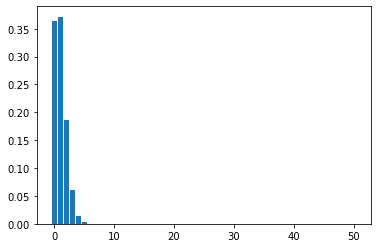

In [6]:
n = 50
p = 0.02
r_values = list(range(n + 1))

# list of pmf values

dist = [stats.binom.pmf(r, n, p) for r in r_values ]

# plotting the graph 
plt.bar(r_values, dist)
plt.show()

## Problem 3
A company produces computer microchips, which have a life expectancy that follows a normal distribution with a mean of 90 months and a standard deviation of 3.7 months.
* If a microchip is guaranteed to work for 84 months, find the probability that it will fail before the guarantee period ends.
* The probability that a microchip is working before the end of the guarantee period is required to be 99%. For how many months should it be guaranteed to work?
* A rival company produces microchips where the probability that they will fail after 84 months is 0.88. Given that the life expectancy also follows a normal distribution with standard deviation 3.7 months, find the mean life expectancy of these chips.

In [105]:
# Define mu and sigma
mu = 90
sigma = 3.7

#If a microchip is guaranteed to work for 84 months, find the probability that it will fail before the guarantee period ends.
# print intro
print(f'X ~ N({mu}, {sigma})')
guarantee_rv = stats.norm(mu,sigma)
print('\nP(X <= 84) = ', guarantee_rv.cdf(84))

#The probability that a microchip is working before the end of the guarantee period is required to be 99%. For how many months should it be guaranteed to work?
print('\nP(X < guarantee period) = 0.99 for months = ', guarantee_rv.ppf(0.99)) #norm inv distribution

#A rival company produces microchips where the probability that they will fail after 84 months is 0.88. 
#Given that the life expectancy also follows a normal distribution with standard deviation 3.7 months, find the mean life expectancy of these chips.
# Define Z
Z = stats.norm(0,1)

z1 = Z.ppf(1-0.88)

mu, sigma = sp.symbols('mu sigma', real=True)
z1 = sp.sympify(z1)
sigma = 3.7

eq = sp.Eq((84-mu)/sigma, z1)

sol = sp.solve((eq), (mu, sigma))
sol
print(f'The mean life expectancy of the rival company products is {round(sol[0][0], 4)} days')

X ~ N(90, 3.7)

P(X <= 84) =  0.052442195093830156

P(X < guarantee period) = 0.99 for months =  98.60748713395111
The mean life expectancy of the rival company products is 88.3475 days


## Problem 4
The speeds of cars at a certain point on a straight road are normally distributed with mean $\mu$ and standard deviation $\sigma$. 15% of the cars travelled at speeds greater than 90 km/h and 12% of them at speeds less than 40 km/h. Find $\mu$ and $\sigma$.

In [39]:
# Define Z
Z = stats.norm(0,1)

z1 = Z.ppf(1-0.15)
z2 = Z.ppf(0.12)

mu, sigma = sp.symbols('mu sigma', real=True)
z1 = sp.sympify(z1)
z2 = sp.sympify(z2)

eq_1 = sp.Eq((90-mu)/sigma, z1)
eq_2 = sp.Eq((40-mu)/sigma, z2)

sol = sp.solve((eq_1, eq_2), (mu, sigma))

print('Mean mu = ', sol[mu])
print('St. dev sigma = ', sol[sigma])

Mean mu =  66.5663396278966
St. dev sigma =  22.6099049004478


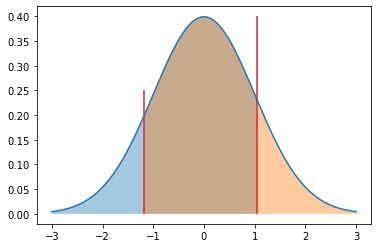

In [92]:
Z = stats.norm(0,1)
z1 = Z.ppf(1-0.15)
z2 = Z.ppf(0.12)

xs = np.linspace(-3, 3, 1000)
plt.figure()
plt.vlines(z1, ymin=0, ymax=0.4, colors='tab:red')
plt.fill_between(np.linspace(-3, z1), Z.pdf(np.linspace(-3, z1)), alpha=0.4)

plt.vlines(z2, ymin=0, ymax=0.25, colors='tab:red')
plt.fill_between(np.linspace(z2, 3), Z.pdf(np.linspace(z2, 3)), alpha=0.4)
plt.plot(xs, Z.pdf(xs))
plt.show()

## Problem 5

Poisson Distribution: instead of counting successes in a certain number of trials like the Binomial Distribution does, the Poisson distribution does something different: it counts the number of occurrences per unit of time/space (think of “occurrences” as successes). For example, if someone is known to catch on average 3 fish per hour, then a Poisson distribution could model the probability of the number of fish caught per hour (i.e. what is the probability of catching certain number of fish). The advantage of the Poisson distribution is that the possible number of observed occurrences is unlimited in theory: one might catch 3 fish on average, but in a happy-hour they might catch even 100 (though this is veeeeery unlikely).
 
If the random variable $X$ follows a Poisson distribution, and we label the average number of occurrences per unit $\lambda>0$, we write $X$~$Po(\lambda)$, then the probability of observing $k$ occurences ($k$ is integer and is at least zero) is given by:

\begin{equation} P(X=k) = \frac{\lambda^k}{k!} e^{-\lambda} \end{equation}

In the previous example, if F is the number of fish caught, then $\lambda=3$ and $F$~$Po(3)$ which means that:

\begin{equation} P(X=k) = \frac{3^k}{k!} e^{-3} \end{equation}

a) Calculate the probabilities of catching $k=0$ to $k=10$ fish (beyond 10 the probabilities are very small)

b) Visualize the probabilities using a bar graph.

In [68]:
#3 fish per hour
lmbd = 3 #fish per hour
fish_rv = stats.poisson(lmbd)

zero_fish = round(fish_rv.pmf(0),4)
one_fish = round(fish_rv.pmf(1),4)
two_fish = round(fish_rv.pmf(2),4)
three_fish = round(fish_rv.pmf(3),4)
four_fish = round(fish_rv.pmf(4),4)
five_fish = round(fish_rv.pmf(5),4)
six_fish = round(fish_rv.pmf(6),4)
seven_fish = round(fish_rv.pmf(7),4)
eight_fish = round(fish_rv.pmf(8),4)
nine_fish = round(fish_rv.pmf(9),4)
ten_fish = round(fish_rv.pmf(10),4)

print('Initial distribution:',zero_fish,one_fish, two_fish, three_fish, four_fish, five_fish, six_fish, seven_fish, eight_fish, nine_fish, ten_fish)
sums = zero_fish + one_fish + two_fish + three_fish + four_fish + five_fish + six_fish + seven_fish + eight_fish + nine_fish + ten_fish
print('cummulative:', sums)

Initial distribution: 0.0498 0.1494 0.224 0.224 0.168 0.1008 0.0504 0.0216 0.0081 0.0027 0.0008
cummulative: 0.9996


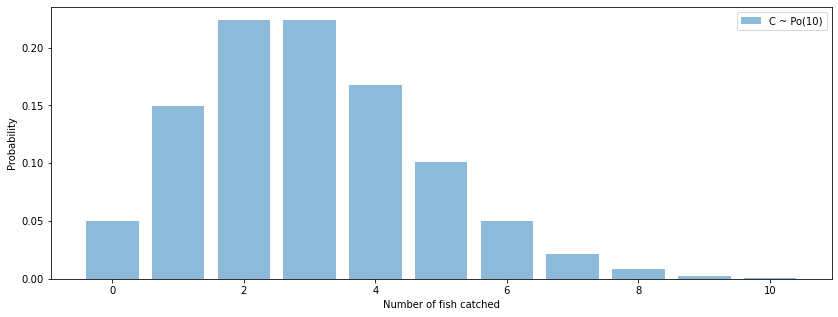

In [106]:
#visualize
lmbd = 3
fish_rv = stats.poisson(lmbd)

ks = np.arange(0, 11)
probs = fish_rv.pmf(ks)
plt.figure(figsize=(14,5))
plt.bar(ks, fish_rv.pmf(ks), alpha=0.5, label = 'C ~ Po(10)')
plt.xlabel('Number of fish catched')
plt.ylabel('Probability')
plt.legend()
plt.show()